# 1. Import Libraries and Load Data


In [1]:
import pandas as pd

In [ ]:
df = pd.read_csv("C:/Users/dhatc/Downloads/Reinforcement Project - Machine Learning-20250902T141951Z-1-001\Reinforcement Project - Machine Learning/ipl_matches.csv")


<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\dhatc\AppData\Local\Temp\ipykernel_23044\2210091132.py:1: SyntaxWarning: invalid escape sequence '\R'
  df = pd.read_csv("C:/Users/dhatc/Downloads/Reinforcement Project - Machine Learning-20250902T141951Z-1-001\Reinforcement Project - Machine Learning/ipl_matches.csv")


In [3]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# 2. Data Cleaning


In [8]:
print(df.isnull().sum())
df['city'].fillna('Unknown', inplace=True)
df['win_by_runs'].fillna(0, inplace=True)

id                   0
Season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64


C:\Users\dhatc\AppData\Local\Temp\ipykernel_23044\2473572304.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['win_by_runs'].fillna(0, inplace=True)


# 3. Encode Categorical Variables


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['team1', 'team2', 'city', 'venue', 'toss_winner', 'winner', 'toss_decision', 'Season']:
    df[col] = le.fit_transform(df[col])

# 4. Remove Invalid Rows


In [10]:
df = df[df['result'] == 'normal']

# 5. Exploratory Data Analysis (EDA)


                 id      Season        city       team1       team2  \
count    743.000000  743.000000  743.000000  743.000000  743.000000   
mean    1773.203230    5.425303   14.930013    6.890983    6.947510   
std     3438.118454    3.366156    8.377576    4.456463    4.274439   
min        1.000000    0.000000    0.000000    0.000000    0.000000   
25%      188.500000    3.000000    8.000000    3.000000    3.000000   
50%      376.000000    5.000000   14.000000    7.000000    7.000000   
75%      566.500000    8.000000   23.000000   10.000000   10.000000   
max    11415.000000   11.000000   32.000000   14.000000   14.000000   

       toss_winner  toss_decision  dl_applied      winner  win_by_runs  \
count   743.000000     743.000000  743.000000  743.000000   743.000000   
mean      6.693136       0.612382    0.025572    6.892328    13.515478   
std       4.333788       0.487535    0.157961    4.428739    23.609342   
min       0.000000       0.000000    0.000000    0.000000     0.

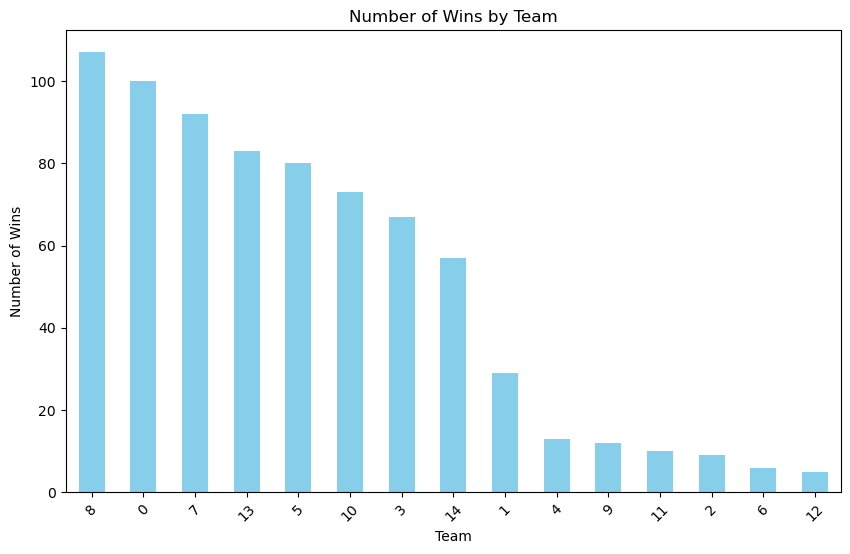

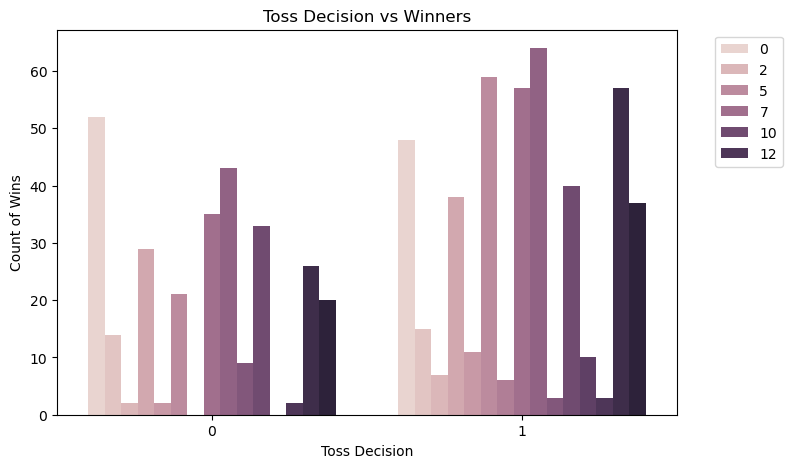

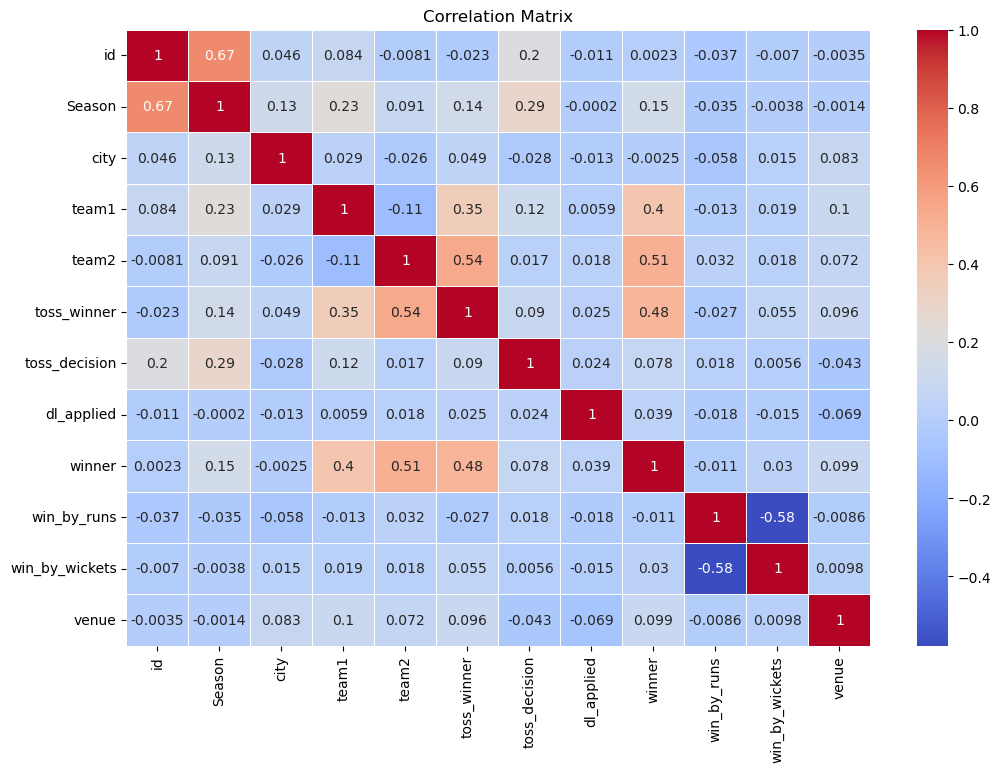

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Summary statistics
print(df.describe())

# 2. Number of wins by team
team_win_counts = df['winner'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10,6))
team_win_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Wins by Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()

# 3. Toss decision effect on wins
plt.figure(figsize=(8,5))
sns.countplot(x='toss_decision', hue='winner', data=df)
plt.title('Toss Decision vs Winners')
plt.xlabel('Toss Decision')
plt.ylabel('Count of Wins')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 4. Correlation Heatmap
corr_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# 6. Data Preprocessing - Feature Selection and Split


In [12]:
from sklearn.model_selection import train_test_split

X = df.drop(['winner', 'id', 'player_of_match', 'date'], axis=1)
y = df['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.dtypes)


Season             int32
city               int32
team1              int32
team2              int32
toss_winner        int32
toss_decision      int32
result            object
dl_applied         int64
win_by_runs        int64
win_by_wickets     int64
venue              int32
umpire1           object
umpire2           object
umpire3           object
dtype: object


# 7. Scale Numeric Features


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num = X_train.select_dtypes(include=['number'])
X_test_num = X_test.select_dtypes(include=['number'])
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)


# 8. One-Hot Encode Categorical Variables and Align


In [14]:
X_train_enc = pd.get_dummies(X_train, drop_first=True)
X_test_enc = pd.get_dummies(X_test, drop_first=True)
X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join='left', axis=1, fill_value=0)

# 9. Train Models



In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

lr = LogisticRegression(max_iter=1000)
svm = SVC()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

lr.fit(X_train_enc, y_train)
svm.fit(X_train_enc, y_train)
knn.fit(X_train_enc, y_train)
dt.fit(X_train_enc, y_train)
rf.fit(X_train_enc, y_train)
xgb.fit(X_train_enc, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dhatc\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [12:58:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

# 10. Evaluate Models

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

models = {
    "Logistic Regression": lr,
    "SVM": svm,
    "KNN": knn,
    "Decision Tree": dt,
    "Random Forest": rf,
    "XGBoost": xgb
}

results = []
for name, model in models.items():
    y_pred = model.predict(X_test_enc)            # Step 1: Make predictions
    acc = accuracy_score(y_test, y_pred)         # Step 2: Calculate accuracy
    results.append([name, acc])                  # Step 3: Store results

    print(f"===== {name} =====")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
print(results_df)


===== Logistic Regression =====
Accuracy: 0.28859060402684567
Confusion Matrix:
 [[8 1 0 3 1 1 0 0 5 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [3 0 0 3 1 3 0 3 3 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 2 0 0 0 0 0 0 0]
 [2 1 0 2 0 4 0 0 4 0 2 0 0 1 1]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 5 5 1 1 0 0 2 0]
 [2 0 0 1 0 1 0 2 9 0 1 0 0 4 2]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 2 0 2 0 0 3 0 4 0 0 3 2]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 2 2 0 2 0 0 6 1]
 [0 0 0 0 0 1 0 2 2 0 1 0 1 0 4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.38      0.39        21
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         2
           3       0.21      0.18      0.19        17
           4       0.00      0.00      0.00         3
           5       0.25      0.24      0.24        17
           6       0

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklea

===== XGBoost =====
Accuracy: 0.9865771812080537
Confusion Matrix:
 [[20  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 17  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 15  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 17  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00        17
      

# 11. Hyperparameter Tuning for XGBoost

In [19]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0]
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit on training data
grid_search.fit(X_train_enc, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\dhatc\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [13:14:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best Accuracy: 0.9679960119641077
